<h1><center> Assignment 1: Analyzing Dataset </center></h1>

#### Submitted by: Ali Milhem
#### Submission Date: February 06/2019
#### Dataset: 2015 Central Line-Associated Bloodstream Infections (CLABSI) Table
#### Link to the Dataset: https://healthdata.gov/dataset/2015-central-line-associated-bloodstream-infections-clabsi-table

        

                                                                      
<h2><center> Reading The Datafile </center></h2> 
I used Panda API to read the csv files shown in the below code: 


In [10]:
import sys
!{sys.executable} -m pip install sodapy
import os
from sodapy import Socrata
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.close('all')
import pandas as pd



In [11]:

client = Socrata("data.oregon.gov", app_token=None)# , os.environ['SOCRATA_TOKEN'])


 Comnnect to data server of Oregon Gov using Socrata  

In [12]:
datasets = ["4arj-uxbw"]
ds = client.get(datasets[0])
print(ds[1:3])

[{'percentile_on_2014_national_sir_distribution': '71-75%', 'observed_infections': '12', 'central_line_days': '7622', 'sir_interpretation_2006_08_us_baseline': 'Fewer infections', 'hospital_location': 'All Neonatal ICUs Combined*', 'sir_icon': 'e0e40dd5-b42e-4307-9694-036e3de5e97b', '_2013_hhs_targets': 'Target Not Met', 'predicted_infections': '16.04', '_2015_sir': '0.748', 'sir_95_ci': '0.405, 1.272', 'hospital_name': ' 1. All Oregon'}, {'percentile_on_2014_national_sir_distribution': '61-65%', 'observed_infections': '4', 'benchmark_icon': '07eebf1b-c770-4832-8887-a466dd21ed64', 'central_line_days': '3996', 'sir_interpretation_2006_08_us_baseline': 'Fewer infections', 'hospital_location': 'Adult Cardiac ICUs', 'sir_icon': '4015d519-9bba-4933-b7e6-284366fe9afa', '_2013_hhs_targets': 'SIR Target (<0.5) Met', 'predicted_infections': '7.99', '_2015_sir': '0.501', 'sir_95_ci': '0.159, 1.207', 'hospital_name': ' 1. All Oregon'}]


Pull the dataset, print 3 records - identify the fromat!
The fromat is what DataFrame can read as records: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_records.html

In [18]:
clabsi= pd.DataFrame.from_records(ds)
clabsi.head(2)
clabsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 15 columns):
_2013_hhs_targets                               196 non-null object
_2015_sir                                       219 non-null object
benchmark_icon                                  149 non-null object
central_line_days                               219 non-null object
county                                          203 non-null object
hospital_location                               219 non-null object
hospital_name                                   219 non-null object
hpp_region                                      203 non-null object
location_1                                      203 non-null object
observed_infections                             219 non-null object
percentile_on_2014_national_sir_distribution    218 non-null object
predicted_infections                            219 non-null object
sir_95_ci                                       217 non-null object
sir_icon   

The column names have underscores in names and lowercased already compared to the csv, but type is Object, and need conversion to int

In [ ]:
clabsi.drop(["County", "sir_icon", "Benchmark Icon"], axis=1, inplace=True)

Original starts bellow

In [41]:
import pandas as pd


clabsi = pd.read_csv("Datasets/2015_Central_Line-Associated_Bloodstream_Infections__CLABSI__Table.csv")

clabsi.head(2)



,Hospital Name,Hospital Location,Central Line Days,Observed Infections,Predicted Infections,2015 SIR,SIR 95% CI,SIR Interpretation (2006-08 US baseline),2013 HHS Targets,Percentile on 2014 National SIR Distribution,County,HPP Region,Location 1,SIR Icon,Benchmark Icon
0,1. All Oregon,All Neonatal ICUs Combined*,7622,12,16.04,0.748,"0.405, 1.272",Fewer infections,Target Not Met,71-75%,NaN,NaN,NaN,https://data.oregon.gov/views/4arj-uxbw/files/...,NaN
1,1. All Oregon,Pediatric Medical/Surgical ICUs,4431,5,13.29,0.376,"0.138, 0.834",Statistically fewer infections,SIR Target (<0.5) Met,51-55%,NaN,NaN,NaN,https://data.oregon.gov/views/4arj-uxbw/files/...,https://data.oregon.gov/views/4arj-uxbw/files/...


 <h2><center> Data Cleaning </center></h2>
                                                                           

1. I dropped the columns that I do not need in this analysis.


In [42]:
clabsi.drop(["County", "SIR Icon", "Benchmark Icon"], axis=1, inplace=True)

In [43]:
clabsi.head(2)

,Hospital Name,Hospital Location,Central Line Days,Observed Infections,Predicted Infections,2015 SIR,SIR 95% CI,SIR Interpretation (2006-08 US baseline),2013 HHS Targets,Percentile on 2014 National SIR Distribution,HPP Region,Location 1
0,1. All Oregon,All Neonatal ICUs Combined*,7622,12,16.04,0.748,"0.405, 1.272",Fewer infections,Target Not Met,71-75%,NaN,NaN
1,1. All Oregon,Pediatric Medical/Surgical ICUs,4431,5,13.29,0.376,"0.138, 0.834",Statistically fewer infections,SIR Target (<0.5) Met,51-55%,NaN,NaN


In [44]:
clabsi.rename(columns={"2015 SIR":"2015 Standard_Infection_Ratio,SIR"}, inplace=True)
clabsi.head()

,Hospital Name,Hospital Location,Central Line Days,Observed Infections,Predicted Infections,"2015 Standard_Infection_Ratio,SIR",SIR 95% CI,SIR Interpretation (2006-08 US baseline),2013 HHS Targets,Percentile on 2014 National SIR Distribution,HPP Region,Location 1
0,1. All Oregon,All Neonatal ICUs Combined*,7622,12,16.04,0.748,"0.405, 1.272",Fewer infections,Target Not Met,71-75%,NaN,NaN
1,1. All Oregon,Pediatric Medical/Surgical ICUs,4431,5,13.29,0.376,"0.138, 0.834",Statistically fewer infections,SIR Target (<0.5) Met,51-55%,NaN,NaN
2,1. All Oregon,Adult Medical/Surgical ICUs,45068,26,76.28,0.341,"0.227, 0.492",Statistically fewer infections,SIR Target (<0.5) Met,46-50%,NaN,NaN
3,1. All Oregon,Adult Medical ICUs,4850,4,11.08,0.361,"0.115, 0.871",Statistically fewer infections,SIR Target (<0.5) Met,51-55%,NaN,NaN
4,1. All Oregon,Adult Cardiothoracic ICUs,8466,5,11.85,0.422,"0.155, 0.935",Statistically fewer infections,SIR Target (<0.5) Met,56-60%,NaN,NaN


In [45]:
clabsi.columns = clabsi.columns.str.replace(' ', '_')
clabsi.head(2)

,Hospital_Name,Hospital_Location,Central_Line_Days,Observed_Infections,Predicted_Infections,"2015_Standard_Infection_Ratio,SIR",SIR_95%_CI,SIR_Interpretation_(2006-08_US_baseline),2013_HHS_Targets,Percentile_on_2014_National_SIR_Distribution,HPP_Region,Location_1
0,1. All Oregon,All Neonatal ICUs Combined*,7622,12,16.04,0.748,"0.405, 1.272",Fewer infections,Target Not Met,71-75%,NaN,NaN
1,1. All Oregon,Pediatric Medical/Surgical ICUs,4431,5,13.29,0.376,"0.138, 0.834",Statistically fewer infections,SIR Target (<0.5) Met,51-55%,NaN,NaN


<h2><center> Summary and Type of Data </center></h2>
                                                                        
The code below shows a summary of the dataset, as well as the size and typr=e of data.

In [46]:
clabsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 12 columns):
Hospital_Name                                   219 non-null object
Hospital_Location                               219 non-null object
Central_Line_Days                               219 non-null int64
Observed_Infections                             219 non-null int64
Predicted_Infections                            219 non-null float64
2015_Standard_Infection_Ratio,SIR               219 non-null object
SIR_95%_CI                                      217 non-null object
SIR_Interpretation_(2006-08_US_baseline)        219 non-null object
2013_HHS_Targets                                196 non-null object
Percentile_on_2014_National_SIR_Distribution    218 non-null object
HPP_Region                                      203 non-null object
Location_1                                      203 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 20.6+ KB


<h2><center> Summary of Statistical Informatiion </center></h2>

In [47]:
clabsi.describe()

,Central_Line_Days,Observed_Infections,Predicted_Infections
count,219.000000,219.000000,219.000000
mean,3109.570776,2.383562,5.277443
std,11924.243042,8.774907,20.080048
min,0.000000,0.000000,0.000000
25%,198.000000,0.000000,0.275000
50%,939.000000,1.000000,1.310000
75%,2300.000000,2.000000,3.810000
max,161715.000000,118.000000,271.590000


                                                                       
 <h2><center> Data Visualization </center></h2>



In [48]:
import  seaborn as sns

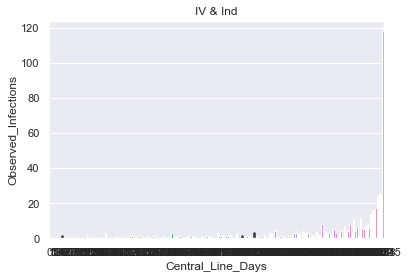

In [49]:
dv = sns.barplot("Central_Line_Days", "Observed_Infections", data=clabsi).set_title("IV & Ind")

The bar chart above shows a positive relationship beteween the days of central line, and the observed infections.


Text(0, 0.5, 'number of observations')

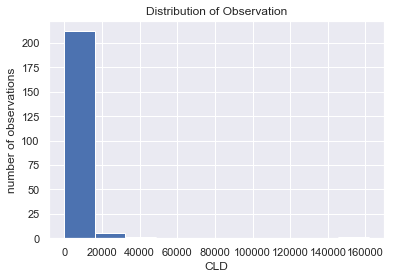

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(clabsi.Central_Line_Days)
plt.title("Distribution of Observation")
plt.xlabel("CLD")
plt.ylabel("number of observations")

This histogram charts shows that most of the cases has central line days (CLD) of less than 20000  

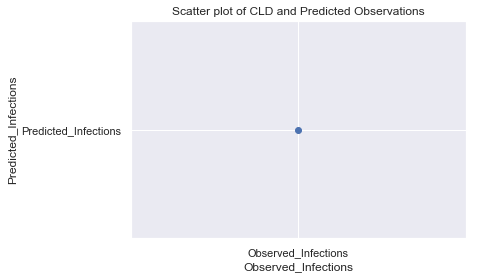

In [51]:
plt.title('Scatter plot of CLD and Predicted Observations')
plt.xlabel("Observed_Infections")
plt.ylabel("Predicted_Infections")
plt.scatter("Observed_Infections", "Predicted_Infections")
plt.show()

Igor's changesstart here

In [56]:
clabsi.columns
numeric_vals = clabsi.filter(regex='(Central_Line_Days,Observed_Infections, Predicted_Infections)', axis= 'columns')
numeric_vals
#less_freq= less_freq_.groupby(level='mmwr_week').sum() # 'reporting_area','mmwr_year'
#sns.pairplot(less_freq, height=5);
#ds = clabsi.loc['Central_Line_Days',
#       'Observed_Infections', 'Predicted_Infections']

""
0
1
2
3
4
5
6
7
8
9
